In [5]:
import pandas as pd
import numpy as np
import os
import pickle

Let's consider the following approach:
1) read by chunks;

2) save to different files of smaller size;

3) preprocess them in order to reduce the overall complexity;

4) merge these files together to get one dataframe

In [32]:
i = 1
chunksize = 100000
for chunk in pd.read_csv(r"C:\Users\danys\Downloads\train_data.csv", chunksize=chunksize):
    chunk.to_csv(r"C:\Users\danys\Downloads\train\train_data_"+str(i)+".csv")
    i += 1
    chunksize += 100000

In [33]:
print(len(os.listdir(r"C:\Users\danys\Downloads\train")))

56


In [6]:
categorical_variables = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

In [62]:
for i in range(1, len(os.listdir(r"C:\Users\danys\Downloads\train")) + 1):
    file = pd.read_csv(r"C:\Users\danys\Downloads\train\train_data_"+str(i)+".csv")
    pd.to_datetime(file.S_2)
    for column in categorical_variables:
        file[column] = file[column].convert_dtypes()
    for col in file.columns:
        if file[col].dtype == 'float64':
            file[col] = file[col].astype('float32')
    file.to_csv(r"C:\Users\danys\Downloads\train_new\train_data_"+str(i)+".csv")

In [4]:
#final_df = pd.DataFrame()

In [ ]:
#for i in os.listdir(r"C:\Users\danys\Downloads\train_new"):
#    file = pd.read_csv(r"C:\Users\danys\Downloads\train_new" + "\\" + str(i))
#    final_df = pd.concat([final_df, file], ignore_index=True, axis=1)

In [3]:
df = pd.read_csv(r"C:\Users\danys\Downloads\train_new\train_data_1.csv")

In [16]:
df.groupby('customer_ID').agg({'S_2': ['min', 'max']})

S_2            
                                                           min         max
customer_ID                                                               
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  2017-03-09  2018-03-13
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  2017-03-01  2018-03-25
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  2017-03-11  2018-03-12
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  2017-03-31  2018-03-29
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  2017-03-30  2018-03-30
...                                                        ...         ...
049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a15...  2017-03-25  2018-03-31
049dc60e06ade9b0bf946472126eed3bb531227f60c7c4f...  2017-03-17  2018-03-26
049dcc14cb874dbcd3b473f17e7eb375e6f13ef591bf0f8...  2017-03-31  2018-03-02
049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99e...  2017-03-08  2018-03-08
049e0948e285ec6767bf07e6e3f5e0919821ee200e359dc...  2017-03-29  2017-04-28

[8294 rows x 2 columns]

In [17]:
df.head()

,Unnamed: 0,Unnamed: 0.1,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0,0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,1,1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,2,2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,3,3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,4,4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827


In [5]:
df.corr()[100:120]

,Unnamed: 0,Unnamed: 0.1,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
D_84,0.011155,0.011155,-0.347611,0.135245,0.068048,-0.137203,0.470727,0.073715,0.228649,0.119155,...,-0.027423,0.003491,0.041860,0.060353,0.030023,0.059985,0.025613,0.060448,0.006138,0.078841
R_16,-0.001356,-0.001356,-0.116198,0.010037,0.022053,-0.049593,0.101986,0.083421,0.001662,0.023915,...,0.127354,0.016837,-0.023331,0.028887,0.039424,0.027345,-0.040792,0.028990,-0.005868,0.021245
B_29,0.038999,0.038999,-0.078830,0.078479,0.043527,-0.078386,0.025031,0.056209,0.018592,0.091711,...,-0.045436,-0.005689,-0.072732,-0.017160,0.038472,-0.018625,-0.067688,-0.016698,-0.031655,-0.014503
B_30,-0.011947,-0.011947,-0.345173,0.079448,0.596116,-0.593286,0.209828,0.136278,0.085824,0.686494,...,-0.054070,0.018080,0.017926,0.105317,0.061769,0.103347,-0.032995,0.105538,0.025997,0.091266
S_18,-0.007148,-0.007148,0.009787,0.066754,-0.021687,0.042039,0.000867,0.029949,0.056715,-0.017282,...,-0.021723,-0.020055,0.017285,-0.032844,-0.017496,-0.031941,0.051461,-0.032751,-0.000238,-0.027195
D_86,-0.000217,-0.000217,0.082498,0.039413,-0.051280,0.083730,-0.033166,-0.096862,-0.001973,-0.049796,...,0.050060,-0.017894,-0.079834,-0.006328,-0.015273,-0.005759,0.054481,-0.006220,0.000530,-0.004579
D_87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R_17,0.004125,0.004125,-0.144591,0.053537,0.029282,-0.052788,0.240003,0.028175,0.084618,0.047747,...,-0.011475,-0.014659,-0.002357,0.031594,0.009999,0.031083,0.008794,0.031637,0.006113,0.040958
R_18,0.000460,0.000460,-0.004974,-0.002594,-0.004837,0.006077,0.007256,-0.001542,0.001912,-0.002556,...,0.005325,0.010652,-0.008816,0.001403,0.002944,0.001316,0.003828,0.001349,0.000297,0.004039
D_88,-0.026756,-0.026756,-0.281446,0.196173,0.254331,-0.432274,0.304326,-0.020238,0.200734,0.260478,...,-0.164288,0.654371,0.172610,0.012365,0.004430,0.010591,-0.185990,0.011205,-0.043819,-0.006384


In [7]:
import matplotlib.pyplot as plt

# CATEGORICAL FEATURES

Let's have an overview on categorical features.

In [8]:
cat = df[categorical_variables]
cat.head()

,B_30,B_38,D_114,D_116,D_117,D_120,D_126,D_63,D_64,D_66,D_68
0,0.0,2.0,1.0,0.0,4.0,0.0,1.0,CR,O,NaN,6.0
1,0.0,2.0,1.0,0.0,4.0,0.0,1.0,CR,O,NaN,6.0
2,0.0,2.0,1.0,0.0,4.0,0.0,1.0,CR,O,NaN,6.0
3,0.0,2.0,1.0,0.0,4.0,0.0,1.0,CR,O,NaN,6.0
4,0.0,2.0,1.0,0.0,4.0,0.0,1.0,CR,O,NaN,6.0


In [47]:
for col in cat.columns:
    print('Insight on the categorical feature', col + ':')
    print(cat[col].value_counts(normalize=True, dropna=False))

Insight on the categorical feature B_30:
0.0    0.85010
1.0    0.13925
2.0    0.01028
NaN    0.00037
Name: B_30, dtype: float64
Insight on the categorical feature B_38:
2.0    0.34509
3.0    0.23148
1.0    0.20772
5.0    0.08175
4.0    0.05401
7.0    0.04969
6.0    0.02989
NaN    0.00037
Name: B_38, dtype: float64
Insight on the categorical feature D_114:
1.0    0.60601
0.0    0.36183
NaN    0.03216
Name: D_114, dtype: float64
Insight on the categorical feature D_116:
0.0    0.96656
NaN    0.03216
1.0    0.00128
Name: D_116, dtype: float64
Insight on the categorical feature D_117:
-1.0    0.26075
 3.0    0.21250
 4.0    0.20731
 2.0    0.11569
 5.0    0.08555
 6.0    0.06362
 NaN    0.03216
 1.0    0.02242
Name: D_117, dtype: float64
Insight on the categorical feature D_120:
0.0    0.85142
1.0    0.11642
NaN    0.03216
Name: D_120, dtype: float64
Insight on the categorical feature D_126:
 1.0    0.76960
 0.0    0.16285
-1.0    0.04624
 NaN    0.02131
Name: D_126, dtype: float64
Insight

For each column we can build a bar plot.

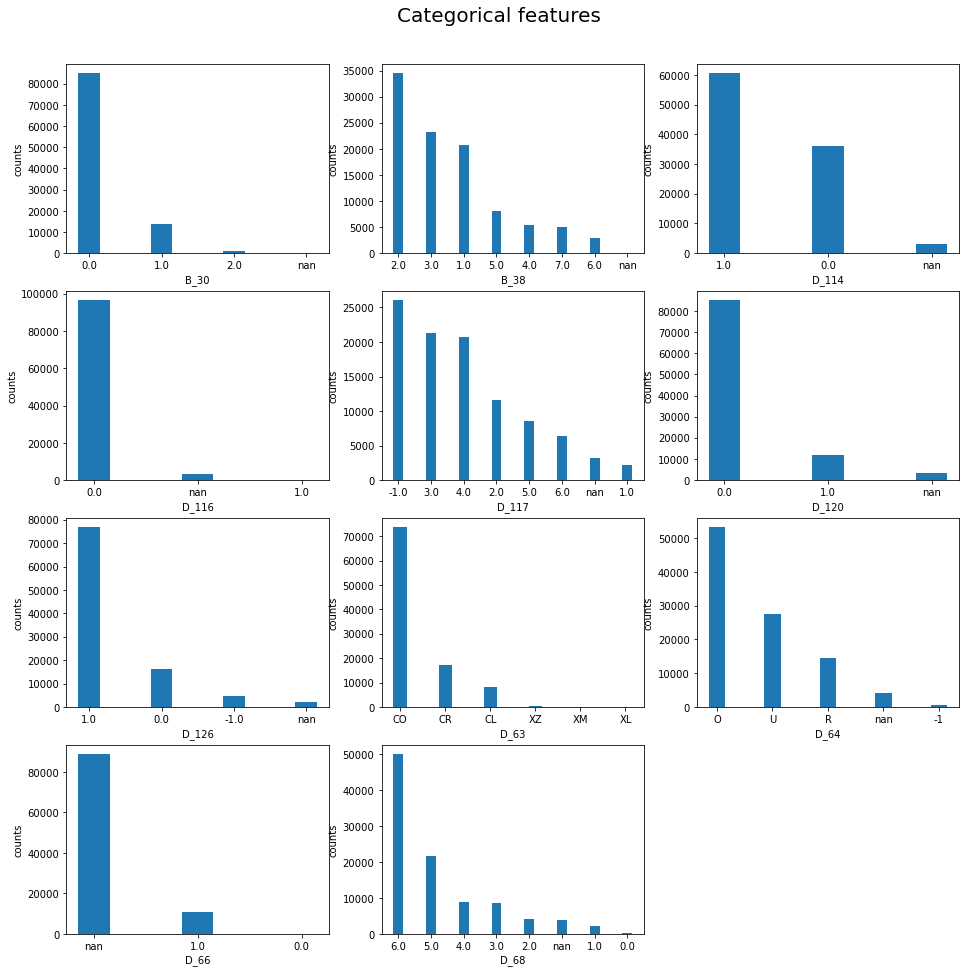

In [46]:
plt.figure(figsize=(16, 16))
for i, col in enumerate(categorical_variables):
    plt.subplot(4,3,i+1)
    data = cat[col].value_counts(dropna=False)
    res = pd.DataFrame(data)
    res.index.name = 'value'
    res.reset_index(inplace=True)
    plt.bar(res.index, res[col], width=0.3)
    plt.xlabel(col)
    plt.ylabel('counts')
    plt.xticks(res.index, res.value)
plt.suptitle('Categorical features', fontsize=20, y=0.93)
plt.show()

# Data featuring

In [8]:
# upgrading pandas library in order to work with pickle files
pip install --upgrade pandas==1.4.1

  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'C:\\Users\\danys\\anaconda3\\Lib\\site-packages\\~andas\\_libs\\algos.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [11]:
train_labels = pd.read_csv(r"C:\Users\danys\Downloads\train_new\train_labels.csv")

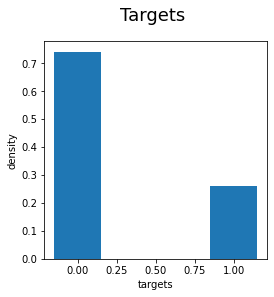

In [24]:
plt.figure(figsize=(4, 4))
data = train_labels.target.value_counts(normalize=True)
res = pd.DataFrame(data)
res.index.name = 'value'
res.reset_index(inplace=True)
plt.bar(res.index, res.target, width=0.3)
plt.xlabel('targets')
plt.ylabel('density')
plt.suptitle('Targets', fontsize=18, y=1)
plt.show()

Hence, we are dealing with imbalanced data, where one target outweigts another. 
In our case we have more than 74% for target '0' and only 26% for '1'. 

In [17]:
res.head()

,target
0,0.741066
1,0.258934


In [57]:
df_1_pkl = pd.read_pickle(r"C:\Users\danys\Downloads\train_new\data_split_1.pkl")
df_1_pkl.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827


In [21]:
num_features = [col for col in df_1_pkl if col not in categorical_variables + ['S_2', 'customer_ID']]

In [22]:
print(len(num_features))

177


# In the search of outliers

<Figure size 1152x1152 with 0 Axes>

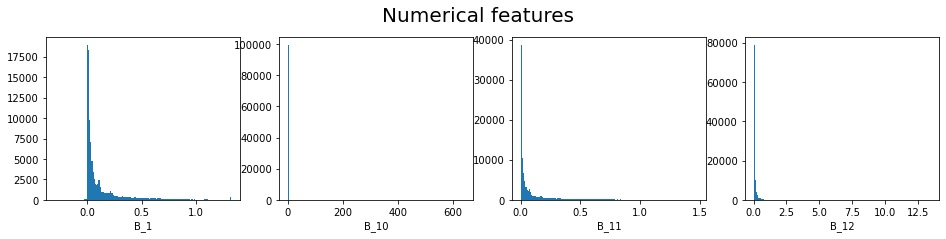

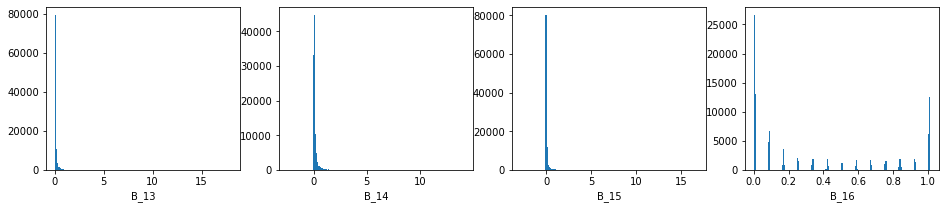

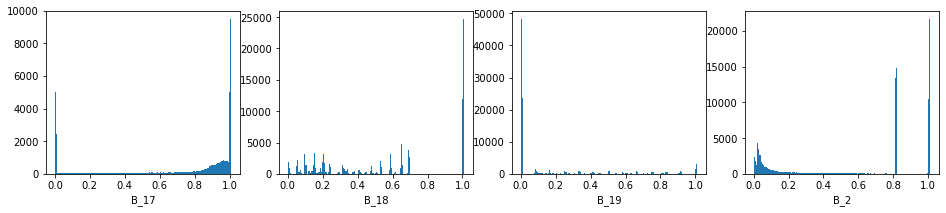

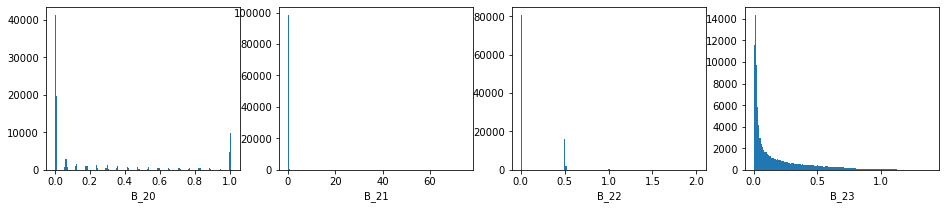

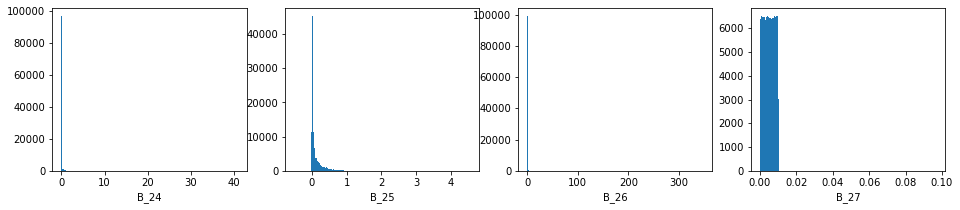

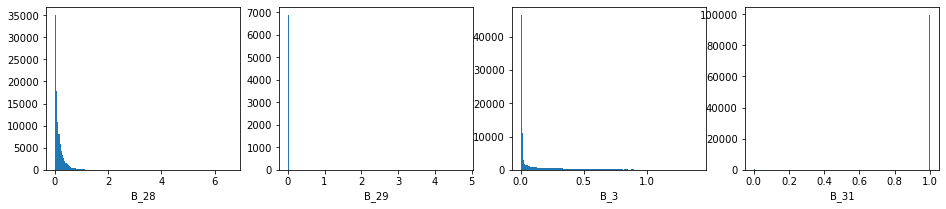

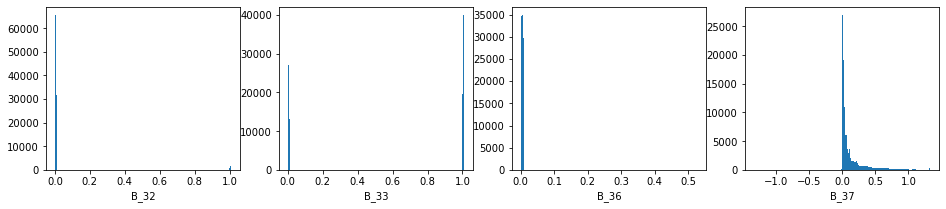

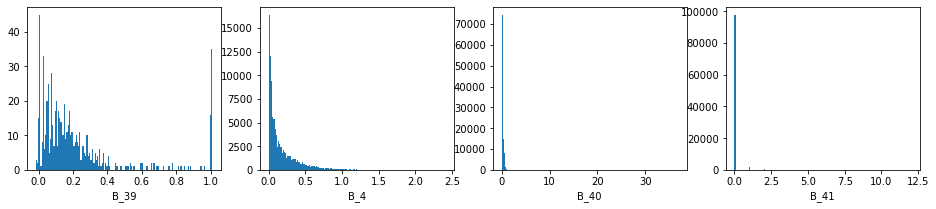

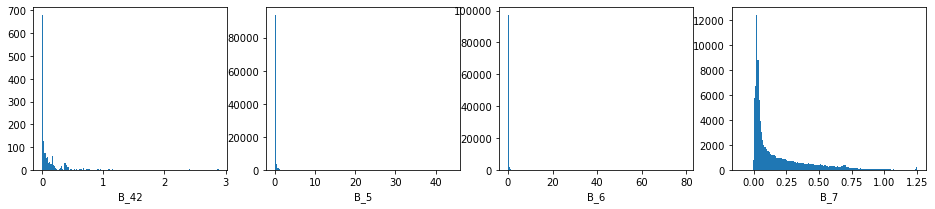

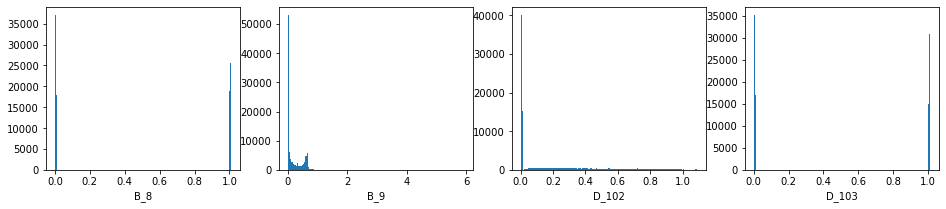

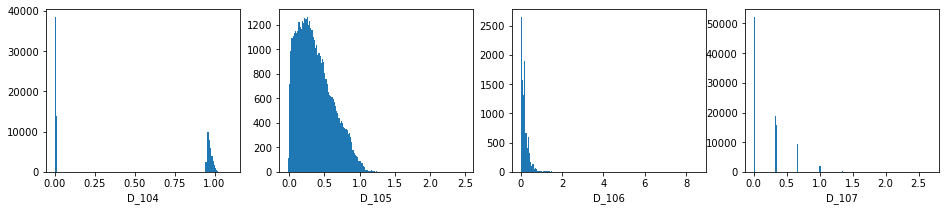

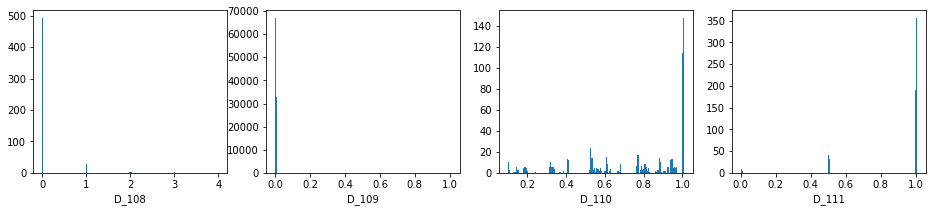

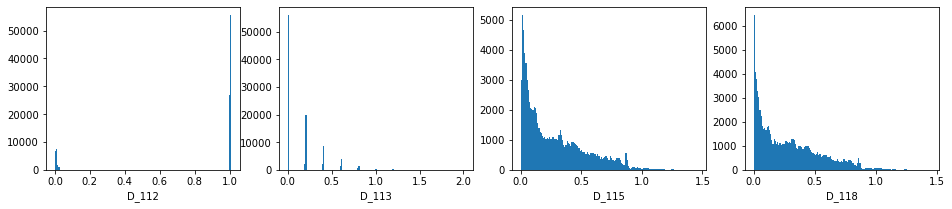

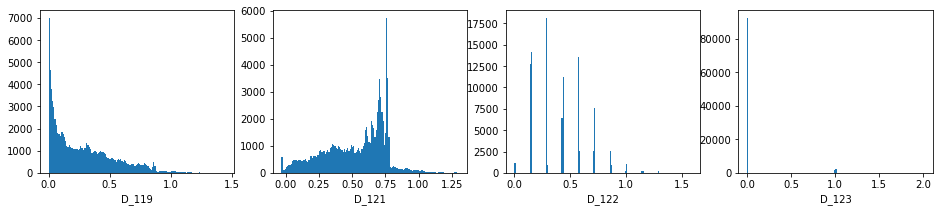

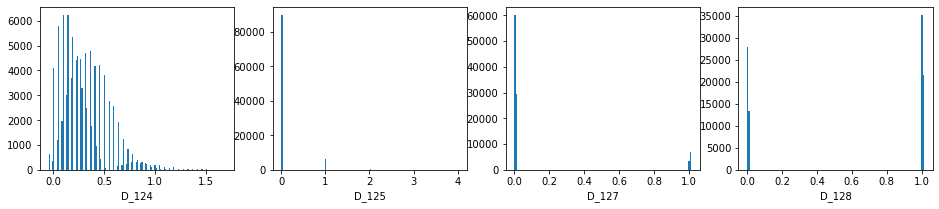

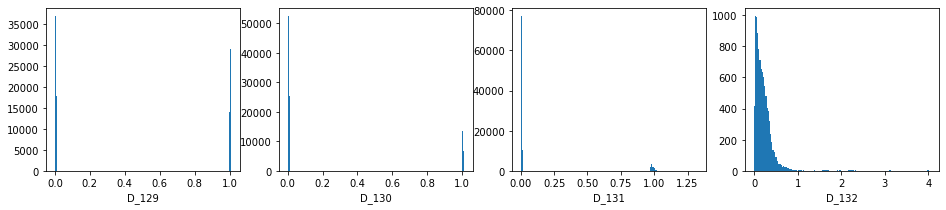

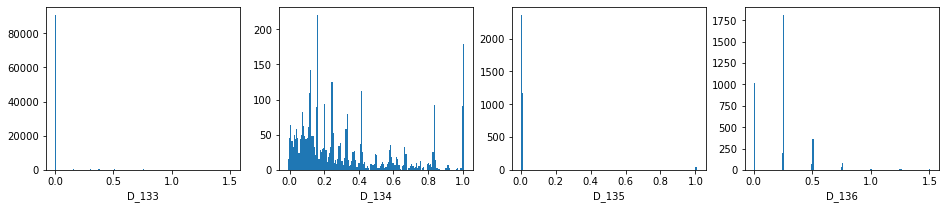

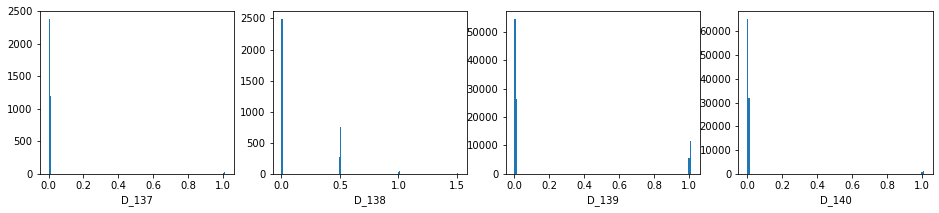

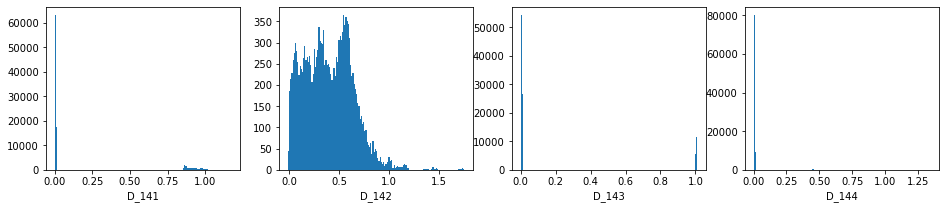

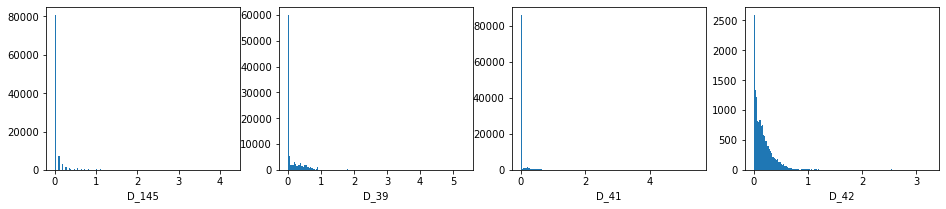

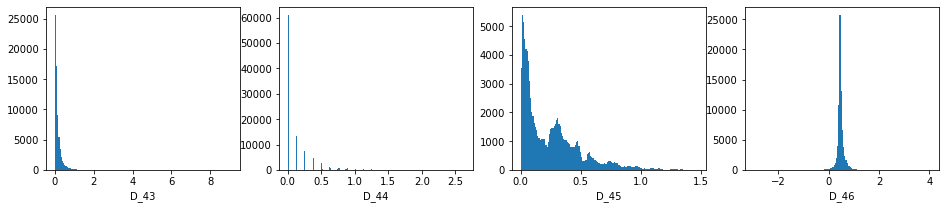

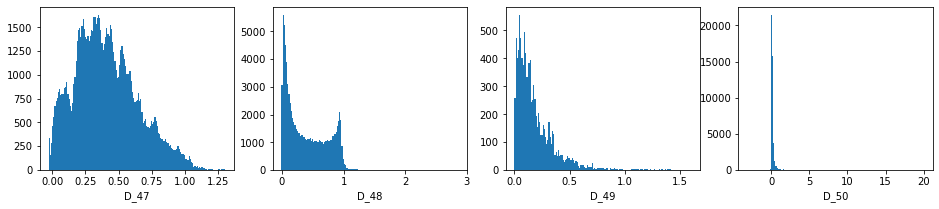

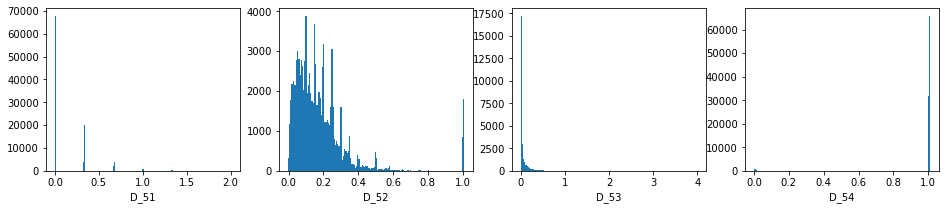

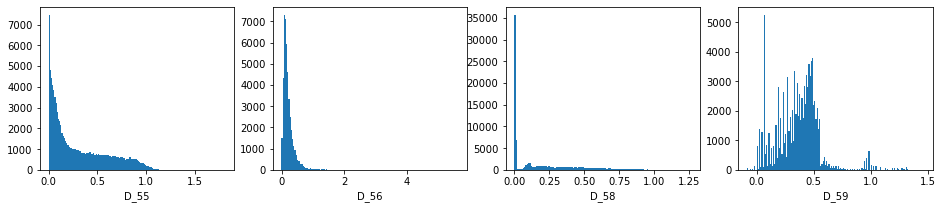

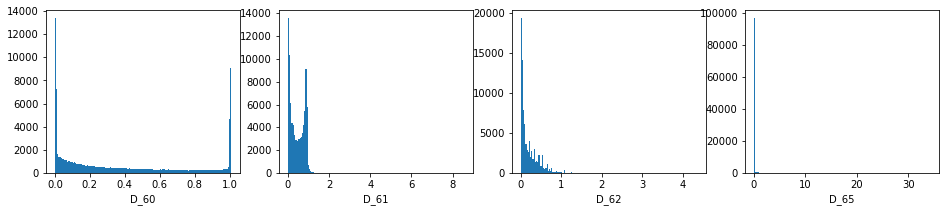

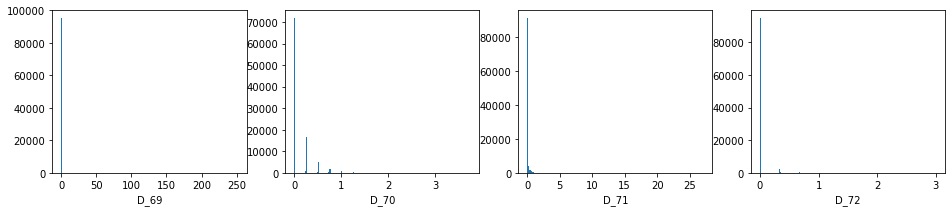

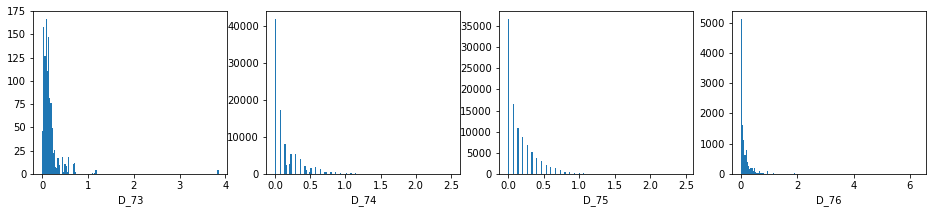

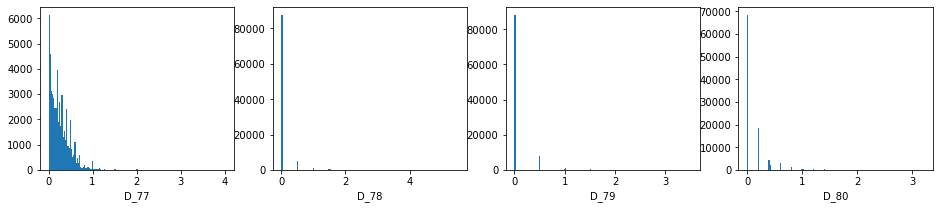

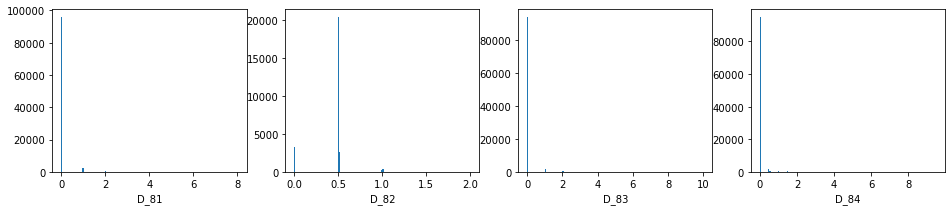

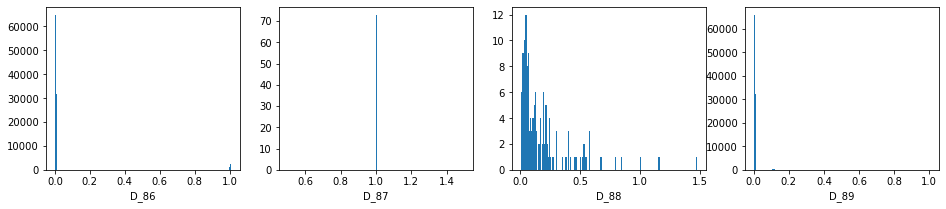

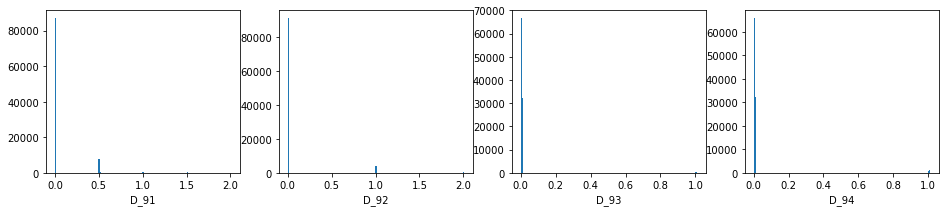

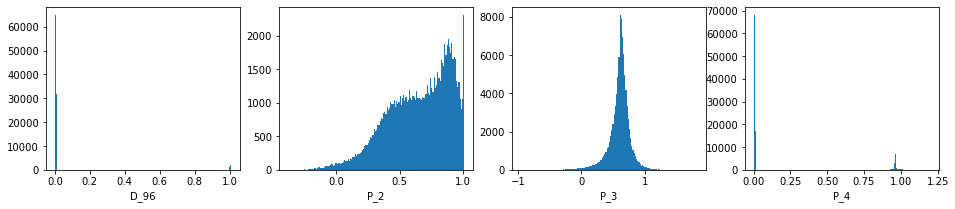

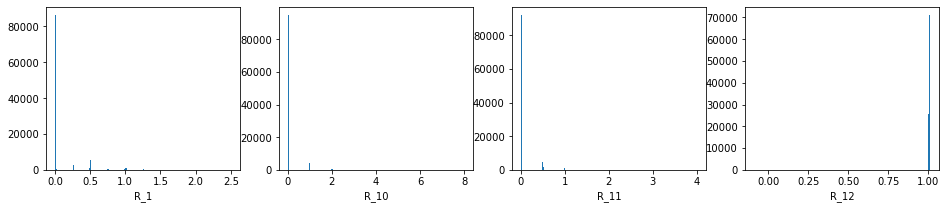

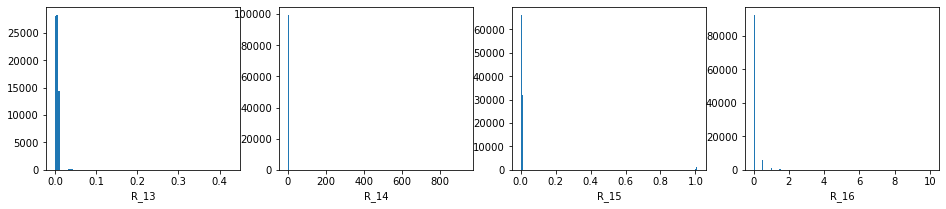

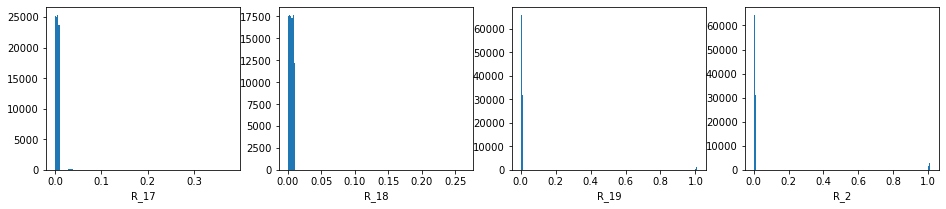

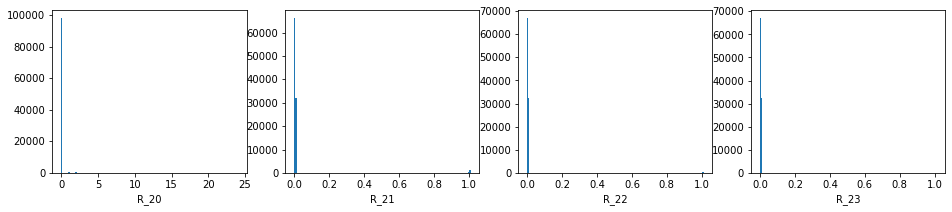

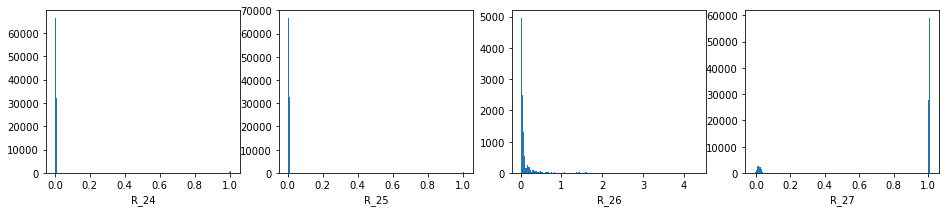

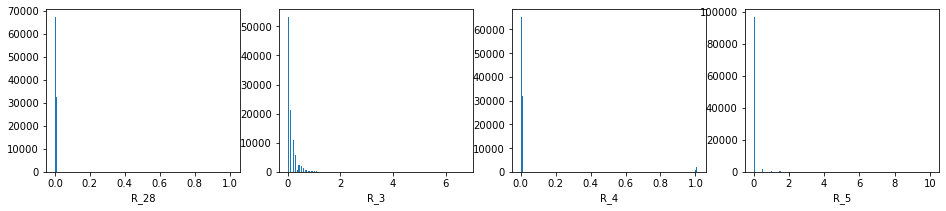

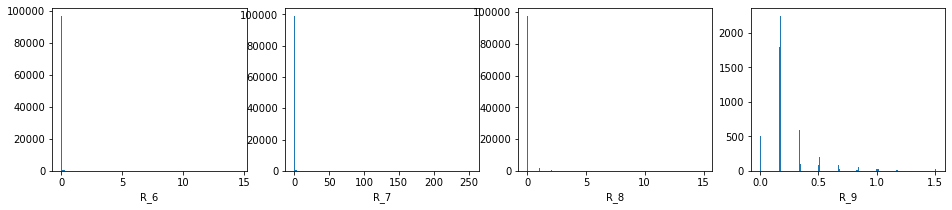

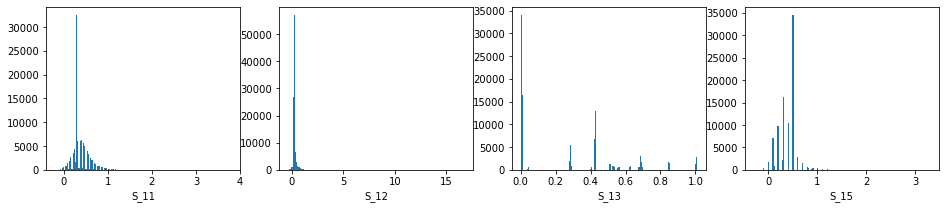

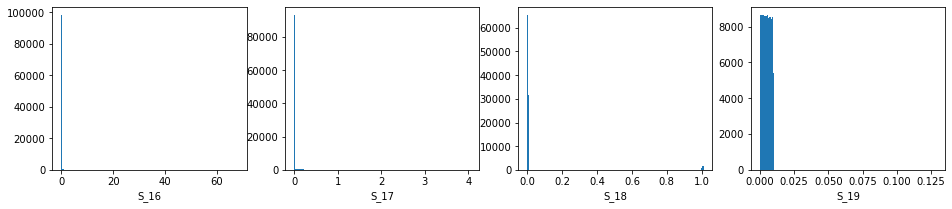

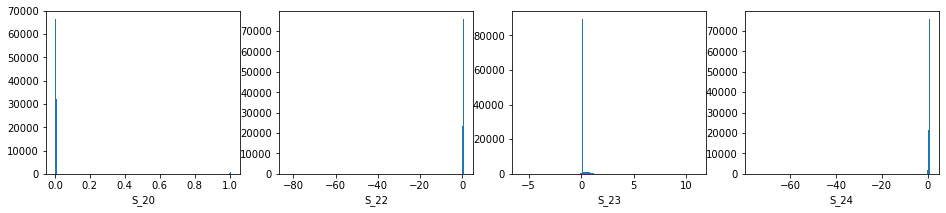

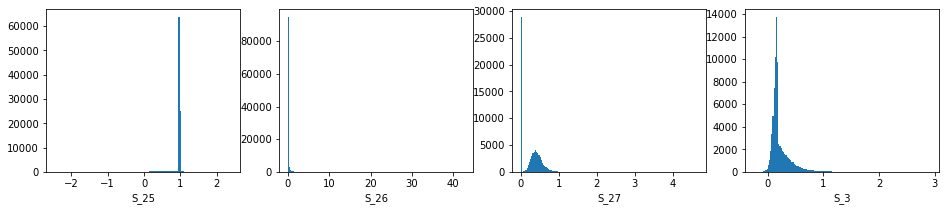

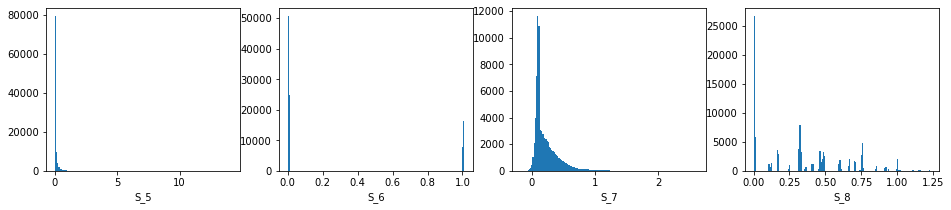

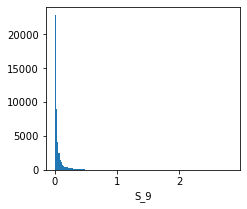

In [32]:
plt.figure(figsize=(16, 16))
for i, col in enumerate(sorted(num_features)):
    if i % 4 == 0: 
        if i > 0: plt.show()
        plt.figure(figsize=(16, 3))
        if i == 0: plt.suptitle('Numerical features', fontsize=20, y=1.02)
    plt.subplot(1, 4, i % 4 + 1)
    plt.hist(df_1_pkl[col], bins=150)
    plt.xlabel(col)
plt.show()

After reviewing aforeobtained results, it's clear that columns 'B_31' and 'D_87' are binary and should be excluded from the list of numerical features. 
Talking about outliers, a lot of columns show a certain kind of skewness. I think, to tackle them we should use scaling. But the whole picture is not that dramatic, as the majority of data is distributed before 0 and 1 or in smaller intervals.

In [33]:
num_features = [col for col in df_1_pkl if col not in categorical_variables + ['S_2', 'customer_ID', 'B_31', 'D_87']]

In [34]:
print(len(num_features))

175


In [49]:
# from sklearn.preprocessing import scale

In [46]:
total_deviation = 0
for col in num_features:
    total_deviation += np.std(df_1_pkl[col])
print('Total deviation before scaling data is:', total_deviation)

Total deviation before scaling data is: 60.932323658918094


In [58]:
aggregated_df = df_1_pkl.groupby('customer_ID')[num_features].agg(['mean', 'median', 'max', 'min', 'std'])

In [59]:
aggregated_df.head()

P_2            \
                                                        mean    median   
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.933824  0.938469   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.899820  0.904814   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.878454  0.884522   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.598969  0.598278   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.891679  0.879238   

                                                                        \
                                                         max       min   
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.960384  0.868580   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.929122  0.861109   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.904482  0.797670   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.623392  0.567442   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.940382  0.805045   

                                                                  D_39  \
                                                         std      mean   
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.024194  0.010704   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.022119  0.215205   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.028911  0.004181   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.020107  0.048862   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.042325  0.004644   

                                                                        \
                                                      median       max   
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.002483  0.091505   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.211731  0.567403   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.004229  0.009704   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.007425  0.268476   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.004148  0.008680   

                                                                        ...  \
                                                         min       std  ...   
customer_ID                                                             ...   
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.001082  0.024444  ...   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.002224  0.199150  ...   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.000802  0.002758  ...   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.000660  0.088466  ...   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.000030  0.002882  ...   

                                                       D_144            \
                                                        mean    median   
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.005283  0.005492   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.004218  0.003169   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.005113  0.004747   
000041bdba6ecadd89a52d11886e8eaaec9325906c97233...  0.004768  0.004793   
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad...  0.004380  0.004070   

                                                                        \
                                                         max       min   
customer_ID                                                              
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fb...  0.009616  0.000610   
00000fd6641609c6ece5454664794f0340ad84dddce9a26...  0.009568  0.000027   
00001b22f846c82c51f6e3958ccd81970162bae8b007e80...  0.009415  0.000129   
000041bdba6ecad

In [60]:
aggregated_df.shape

(8294, 875)